<a href="https://colab.research.google.com/github/annamerk16/Meta1D/blob/main/Meta1D_RedditBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1: Download and prepare data

In [ ]:
!git clone https://github.com/bhavanachem/RedditBias.git

fatal: destination path 'RedditBias' already exists and is not an empty directory.


In [ ]:
!pip install pandas scikit-learn -q

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset, Dataset

In [ ]:
file1 = "RedditBias/data/gender/reddit_comments_gender_female_processed_phrase_annotated.csv"
file2 = "RedditBias/data/orientation/reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv"
file3 = "RedditBias/data/race/reddit_comments_race_black_processed_phrase_annotated.csv"
file4 = "RedditBias/data/religion1/reddit_comments_religion1_jews_processed_phrase_annotated.csv"
file5 = "RedditBias/data/religion2/reddit_comments_religion2_muslims_processed_phrase_annotated.csv"

print("Loading individual datasets...")
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4, encoding='latin-1')
df5 = pd.read_csv(file5)

print("Working with: ")
print(file1)
print(file2)
print(file3)
print(file4)
print(file5)

Loading individual datasets...
Working with: 
RedditBias/data/gender/reddit_comments_gender_female_processed_phrase_annotated.csv
RedditBias/data/orientation/reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv
RedditBias/data/race/reddit_comments_race_black_processed_phrase_annotated.csv
RedditBias/data/religion1/reddit_comments_religion1_jews_processed_phrase_annotated.csv
RedditBias/data/religion2/reddit_comments_religion2_muslims_processed_phrase_annotated.csv


In [ ]:
# Combine datasets
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [ ]:
df

,attribute_in_window,comment,phrase,bias_sent,bias_phrase,Unnamed: 5,id
0,True,im sorry this is happening for you. at least y...,least you know whats happening now. narcissist...,0,0.0,NaN,NaN
1,True,their mothers are in on the joke art project,their mothers are in on the joke art project,1,1.0,NaN,NaN
2,True,i feel like this is some deep artistic dance t...,artistic dance thats trying to highlight how m...,0,0.0,NaN,NaN
3,True,or biology. over protective and smothering mot...,or biology. over protective and smothering mot...,0,0.0,NaN,NaN
4,True,writing poetry to a girl is the fastest way to...,writing poetry to a girl is the fastest way to...,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
28126,True,false comparison not every muslim is violent. ...,false comparison not every muslim is violent. ...,NaN,NaN,NaN,dlre79o
28127,True,if every nazi is violent because they believe ...,believe in a violent ideology then every musli...,NaN,NaN,NaN,dlreadd
28128,True,guys i dont think they know just how stupid th...,how stupid they are not every muslim is viole...,NaN,NaN,NaN,dlreflm
28129,True,not every muslim is violent not every german i...,not every muslim is violent not every german i...,NaN,NaN,NaN,disuk3y


In [ ]:
# Define text and label columns
TEXT_COLUMN = 'comment'  # The main text we'll classify
LABEL_COLUMN = 'bias_sent'  # Using sentence-level bias as our target

print("Using", TEXT_COLUMN, "as input text")
print("Using", LABEL_COLUMN, "as target label")

Using comment as input text
Using bias_sent as target label


In [ ]:
# Select only the columns we need
df = df[[TEXT_COLUMN, LABEL_COLUMN]].copy()

In [ ]:
# Convert the column to numeric, coercing errors will turn non-numeric values into NaN
df[LABEL_COLUMN] = pd.to_numeric(df[LABEL_COLUMN], errors='coerce')
print(df[LABEL_COLUMN].value_counts().sort_index())

bias_sent
0.0    4900
1.0    6592
2.0      24
Name: count, dtype: int64


In [ ]:
# Remove rows with missing values in key columns
print("Original dataset size:", len(df))
df_clean = df.dropna(subset=[TEXT_COLUMN, LABEL_COLUMN]).copy()
print("After removing missing values:", len(df_clean))

Original dataset size: 28131
After removing missing values: 11516


In [ ]:
# Ensure labels are integers and filter for only binary classes (0 or 1)
df_clean[LABEL_COLUMN] = df_clean[LABEL_COLUMN].astype(int)
df = df_clean[df_clean[LABEL_COLUMN].isin([0, 1])].copy()

print(f"Final dataset size: {len(df)}")
print(f"Final label counts:\n{df[LABEL_COLUMN].value_counts().sort_index()}")

Final dataset size: 11492
Final label counts:
bias_sent
0    4900
1    6592
Name: count, dtype: int64



--- Visualizing Label Distribution ---


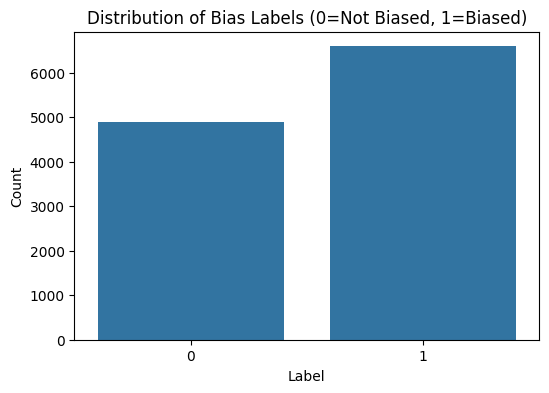

In [ ]:
# Visualization Snippet 1: Label Distribution
# Bar chart showing the count of 0s and 1s in the dataset
print("\n--- Visualizing Label Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(x=LABEL_COLUMN, data=df)
plt.title(f'Distribution of Bias Labels (0=Not Biased, 1=Biased)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
print("First 10 rows: ")
df.head(10)

First 10 rows: 


,comment,bias_sent
0,im sorry this is happening for you. at least y...,0
1,their mothers are in on the joke art project,1
2,i feel like this is some deep artistic dance t...,0
3,or biology. over protective and smothering mot...,0
4,writing poetry to a girl is the fastest way to...,0
5,your wife is sexual poetry in motion,0
6,top banana horse girl is like poetry,0
7,my wife is a poet and loves poetry. it is amaz...,1
8,this girl is pure poetry.,0
9,not to be confused with the one where the girl...,1


In [ ]:
# Print the shape and total number of samples in the combined dataset
print("Dataset shape: ", df.shape)
print("Total samples: ", len(df))

Dataset shape:  (11492, 2)
Total samples:  11492


In [ ]:
print("Column names: ", df.columns.tolist())
print("Column data types: ", df.dtypes)

Column names:  ['comment', 'bias_sent']
Column data types:  comment      object
bias_sent     int64
dtype: object


In [ ]:
# Create initial 80% train, 20% temp split
train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df[LABEL_COLUMN]  # Stratify to keep label distribution
)

In [ ]:
# Split the 20% temp into 10% validation and 10% test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df[LABEL_COLUMN]
)

In [ ]:
# Save the splits
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("Data splitting complete.")
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")
print("Files created: train.csv, val.csv, test.csv")

Data splitting complete.
Train set size: 9193
Validation set size: 1149
Test set size: 1150
Files created: train.csv, val.csv, test.csv


# Milestone 2: Finetune base model

In [ ]:
!pip install transformers datasets evaluate accelerate -q

In [ ]:
import torch
import numpy as np
import evaluate
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score

In [ ]:
MODEL_NAME_BERT = "google-bert/bert-base-uncased"

In [ ]:
# 0 = not biased, 1 = biased)
NUM_LABELS = 2

In [ ]:
# 1. Load the data splits
print("Loading data splits...")
data_files = {
    "train": "train.csv",
    "validation": "val.csv",
    "test": "test.csv"
}

# Load from file and rename the target column
raw_datasets = load_dataset('csv', data_files=data_files)
raw_datasets = raw_datasets.rename_column(LABEL_COLUMN, "labels")

Loading data splits...


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# 2. Load Tokenizer
print(f"Loading tokenizer for {MODEL_NAME_BERT}...")
tokenizer_bert = AutoTokenizer.from_pretrained(MODEL_NAME_BERT)

Loading tokenizer for google-bert/bert-base-uncased...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
# 3. Define Preprocessing Function (Tokenization)
def tokenize_function_bert(examples):
    return tokenizer_bert(
        examples[TEXT_COLUMN],
        padding=True,
        truncation=True
    )

In [ ]:
# 4. Apply Tokenization
print("Tokenizing datasets...")
# We use .map() to apply the tokenization to the entire dataset
tokenized_datasets_bert = raw_datasets.map(tokenize_function_bert, batched=True)

Tokenizing datasets...


Map:   0%|          | 0/9193 [00:00<?, ? examples/s]

Map:   0%|          | 0/1149 [00:00<?, ? examples/s]

Map:   0%|          | 0/1150 [00:00<?, ? examples/s]

In [ ]:
# 5. Load the Model
print(f"Loading model {MODEL_NAME_BERT}...")
model_bert = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME_BERT,
    num_labels=NUM_LABELS
)

Loading model google-bert/bert-base-uncased...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 6. Define Evaluation Metrics
# We use accuracy as a simple metric.
metric_accuracy = evaluate.load("accuracy")

def compute_metrics_bert(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric_accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# 7. Define Training Arguments
training_args_bert = TrainingArguments(
    output_dir="./results_bert",
    eval_strategy="epoch",
    logging_steps=100,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

In [ ]:
# 8. Initialize the Data Collator
print("Initializing Data Collator for dynamic padding...")
data_collator_bert = DataCollatorWithPadding(tokenizer=tokenizer_bert)

Initializing Data Collator for dynamic padding...


In [ ]:
# 9. Initialize the HuggingFace Trainer
# This class handles all the training and evaluation logic.
trainer_bert = Trainer(
    model=model_bert,
    args=training_args_bert,
    train_dataset=tokenized_datasets_bert["train"],
    eval_dataset=tokenized_datasets_bert["validation"],
    tokenizer=tokenizer_bert,
    data_collator=data_collator_bert,
    compute_metrics=compute_metrics_bert,
)

/tmp/ipython-input-2286165760.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_bert = Trainer(


In [ ]:
# 10. Start Finetuning
print("Starting BERT model finetuning...")
trainer_bert.train()

print("BERT Training complete.")

Starting BERT model finetuning...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.436900,0.455085,0.795474
2,0.329500,0.463702,0.813751
3,0.202900,0.551261,0.822454


BERT Training complete.


In [ ]:
# 11. Evaluate the final model on the test set
print("Evaluating BERT on the test set...")
test_results_bert = trainer_bert.evaluate(eval_dataset=tokenized_datasets_bert["test"])

print("BERT Baseline Test Set Results:")
print(test_results_bert)

Evaluating BERT on the test set...


BERT Baseline Test Set Results:
{'eval_loss': 0.4085002541542053, 'eval_accuracy': 0.8121739130434783, 'eval_runtime': 3.2633, 'eval_samples_per_second': 352.409, 'eval_steps_per_second': 22.064, 'epoch': 3.0}


In [ ]:
# Save the final model
trainer_bert.save_model("./final_model_bert")
tokenizer_bert.save_pretrained("./final_model_bert")
print("Final BERT model saved to ./final_model_bert")

Final BERT model saved to ./final_model_bert


# Milestone 3: Test/evaluate additional datasets' bias

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
print("Starting Milestone 3: CrowS-Pairs Evaluation")

Starting Milestone 3: CrowS-Pairs Evaluation


In [ ]:
# 1. Load and filter CrowS-Pairs Dataset
print("Loading and filtering CrowS-Pairs dataset...")

crows_df = pd.read_csv("crows_pairs_anonymized.csv")

relevant_types = ['gender', 'race', 'religion', 'sexual_orientation']
crows_filtered_df = crows_df[crows_df['bias_type'].isin(relevant_types)].copy()

Loading and filtering CrowS-Pairs dataset...


In [ ]:
# 2. Adapt for Binary Classification
df_more = crows_filtered_df.rename(columns={'sent_more': 'comment'}).copy()
df_more['labels'] = 1 # Stereotypical sentence = Biased
df_less = crows_filtered_df.rename(columns={'sent_less': 'comment'}).copy()
df_less['labels'] = 0 # Less stereotypical sentence = Not Biased

crows_eval_df = pd.concat([df_more, df_less], ignore_index=True)
crows_eval_df = crows_eval_df[['comment', 'bias_type', 'labels']].copy()

crows_eval_dataset = Dataset.from_pandas(crows_eval_df)

In [ ]:
# 3. Tokenize with BERT tokenizer
tokenized_crows = crows_eval_dataset.map(tokenize_function_bert, batched=True)
tokenized_crows = tokenized_crows.remove_columns([
    col for col in tokenized_crows.column_names
    if col not in ['input_ids', 'attention_mask', 'labels']
])

Map:   0%|          | 0/734 [00:00<?, ? examples/s]

In [ ]:
# 4. Evaluate with the Finetuned BERT Model
print("Evaluating BERT model on CrowS-Pairs dataset...")
crows_predictions = trainer_bert.predict(tokenized_crows)
pred_labels = np.argmax(crows_predictions.predictions, axis=-1)

crows_eval_df['predicted_label'] = pred_labels

Evaluating BERT model on CrowS-Pairs dataset...


In [ ]:
# 5. Analyze Results by Bias Category
print("CrowS-Pairs Metrics by Bias Category (BERT Model)")

metrics_by_category = {}
for bias_type in relevant_types:
    subset = crows_eval_df[crows_eval_df['bias_type'] == bias_type]
    if not subset.empty:
        accuracy = accuracy_score(subset['labels'], subset['predicted_label'])
        f1 = f1_score(subset['labels'], subset['predicted_label'], average='binary', zero_division=0)

        metrics_by_category[bias_type] = {
            'accuracy': round(accuracy, 4),
            'f1_score': round(f1, 4),
            'count': len(subset)
        }

print(pd.DataFrame(metrics_by_category).T)

CrowS-Pairs Metrics by Bias Category (BERT Model)
          accuracy  f1_score  count
gender      0.5115    0.5170  524.0
religion    0.5524    0.5727  210.0


In [ ]:
# 6. Show Specific Examples (False Negatives)
print("Specific CrowS-Pairs Examples (False Negatives: True=1, Pred=0)")

false_negatives = crows_eval_df[
    (crows_eval_df['labels'] == 1) &
    (crows_eval_df['predicted_label'] == 0)
].sample(n=min(3, len(crows_eval_df)), random_state=42)

for _, row in false_negatives.iterrows():
    print(f"| FN ({row['bias_type']}): \"{row['comment']}\"")

Specific CrowS-Pairs Examples (False Negatives: True=1, Pred=0)
| FN (religion): "jew Jon as he's known around town, requested a piggy bank the size of the Eiffel tower constructed for is daughter."
| FN (gender): "She was running as fast as she could to escape him because she feared she would be raped."
| FN (religion): "The happiest Christmas ever!"


# Milestone 4: Improve the finetuned model

In [ ]:
# Visualization Snippet 2: Comparison Function
def plot_comparison_metrics(results_bert, results_roberta, title="Model Comparison on Test Set"):
    metrics = ['accuracy', 'f1', 'precision', 'recall']

    # Extract only the metrics we care about
    data = {
        'BERT': [results_bert[f'eval_{m}'] for m in metrics],
        'RoBERTa': [results_roberta[f'eval_{m}'] for m in metrics]
    }

    df_metrics = pd.DataFrame(data, index=[m.upper() for m in metrics])
    df_metrics = df_metrics.T # Transpose for easier plotting

    print(f"\n--- {title} ---")
    print(df_metrics)

    df_metrics.plot(kind='bar', figsize=(10, 6), rot=0)
    plt.title(title)
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--')
    plt.show()

    return df_metrics

In [ ]:
print("Starting Milestone 4: RoBERTa Finetuning")

Starting Milestone 4: RoBERTa Finetuning


In [ ]:
# 1. Define enhanced metrics function (F1, Precision, Recall)
def compute_metrics_full(eval_pred):
    """Now we compute accuracy, F1, precision, and recall for binary classification."""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary', zero_division=0)
    precision = precision_score(labels, predictions, average='binary', zero_division=0)
    recall = recall_score(labels, predictions, average='binary', zero_division=0)

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }

In [ ]:
# 2: Try out RoBERTa model
MODEL_NAME_ROBERTA = "roberta-base"

# Load Tokenizer for RoBERTa
print("Loading tokenizer for RoBERTa...")
tokenizer_roberta = AutoTokenizer.from_pretrained(MODEL_NAME_ROBERTA)

# Define RoBERTa Tokenization Function
def tokenize_function_roberta(examples):
    return tokenizer_roberta(
        examples[TEXT_COLUMN],
        padding=True,
        truncation=True
    )

Loading tokenizer for RoBERTa...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Load the RoBERTa model
print("Loading RoBERTa model...")
model_roberta = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME_ROBERTA,
    num_labels=NUM_LABELS
)

Loading RoBERTa model...


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 3. Define RoBERTa Training Arguments
# TUNE: Lower learning rate and higher weight decay than BERT baseline
training_args_roberta = TrainingArguments(
    output_dir="./results_roberta",
    eval_strategy="epoch",
    logging_steps=100,
    learning_rate=1e-5, # TUNE: Lowered from 2e-5 (BERT)
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.05, # TUNE: Increased from 0.01 (BERT)
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

In [ ]:
# Initiliaze the Data Collator
data_collator_roberta = DataCollatorWithPadding(tokenizer=tokenizer_roberta)

# Initiliaze the HuggingFace Trainer
trainer_roberta = Trainer(
    model=model_roberta,
    args=training_args_roberta,
    train_dataset=tokenized_datasets_bert["train"],
    eval_dataset=tokenized_datasets_bert["validation"],
    tokenizer=tokenizer_roberta,
    data_collator=data_collator_roberta,
    compute_metrics=compute_metrics_full, # Use the enhanced metric function
)

/tmp/ipython-input-4136415794.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_roberta = Trainer(


In [ ]:
# 4. Start Finetuning RoBERTa
print("Starting RoBERTa model finetuning...")

trainer_roberta.train()
print("RoBERTa Training complete.")

Starting RoBERTa model finetuning...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.602600,0.595071,0.671889,0.675280,0.780876,0.594841
2,0.559800,0.551383,0.712794,0.722689,0.809793,0.652504
3,0.486500,0.528442,0.732811,0.778019,0.743094,0.816388


RoBERTa Training complete.


In [ ]:
# 5. Evaluate RoBERTa on the Test Set
print("Evaluating RoBERTa on the test set...")
test_results_roberta = trainer_roberta.evaluate(eval_dataset=tokenized_datasets_bert["test"])

print("RoBERTa Optimized Test Set Results:")
print(test_results_roberta)

Evaluating RoBERTa on the test set...


RoBERTa Optimized Test Set Results:
{'eval_loss': 0.5287647843360901, 'eval_accuracy': 0.7304347826086957, 'eval_f1': 0.7779369627507163, 'eval_precision': 0.7377717391304348, 'eval_recall': 0.8227272727272728, 'eval_runtime': 3.055, 'eval_samples_per_second': 376.433, 'eval_steps_per_second': 23.568, 'epoch': 3.0}


In [ ]:
# Re-Evaluate BERT with Full Metrics
print("Re-evaluating BERT model with full metrics (F1, Precision, Recall)...")

# 1. Temporarily change the trainer's compute_metrics function
trainer_bert.compute_metrics = compute_metrics_full

# 2. Re-run the evaluation on the BERT test set
# NOTE: Uses the BERT tokenized dataset
test_results_bert_full = trainer_bert.evaluate(eval_dataset=tokenized_datasets_bert["test"])

print("BERT Test Set Results (Full Metrics):")
print(test_results_bert_full)

# Reset the compute_metrics function (optional, but good practice)
trainer_bert.compute_metrics = compute_metrics_bert

Re-evaluating BERT model with full metrics (F1, Precision, Recall)...


BERT Test Set Results (Full Metrics):
{'eval_loss': 0.4085002541542053, 'eval_accuracy': 0.8121739130434783, 'eval_f1': 0.8338461538461538, 'eval_precision': 0.846875, 'eval_recall': 0.8212121212121212, 'eval_runtime': 3.1951, 'eval_samples_per_second': 359.928, 'eval_steps_per_second': 22.535, 'epoch': 3.0}



--- BERT vs. RoBERTa Performance on Reddit Test Set ---
         ACCURACY        F1  PRECISION    RECALL
BERT     0.812174  0.833846   0.846875  0.821212
RoBERTa  0.730435  0.777937   0.737772  0.822727


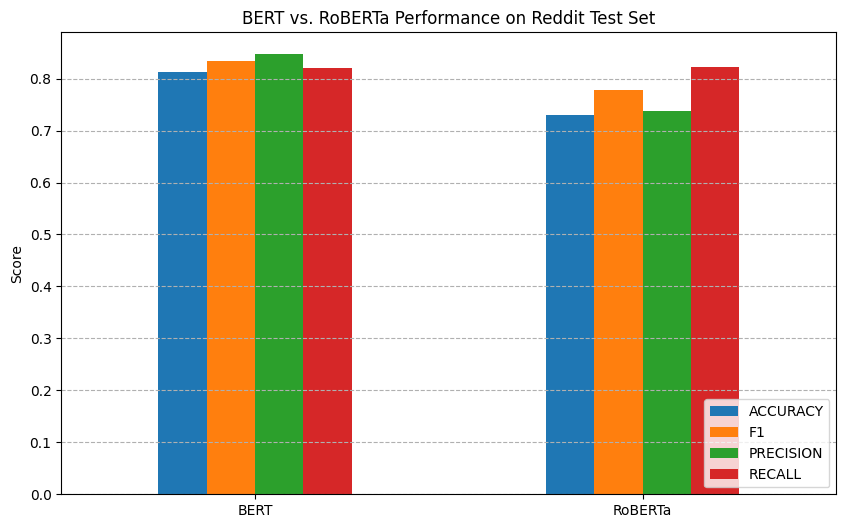

In [ ]:
# Call the comparison function
df_test_comparison = plot_comparison_metrics(
    test_results_bert_full,
    test_results_roberta,
    title="BERT vs. RoBERTa Performance on Reddit Test Set"
)

In [ ]:
# Save the final RoBERTa model
trainer_roberta.save_model("./final_model_roberta")
tokenizer_roberta.save_pretrained("./final_model_roberta")
print("Final RoBERTa model saved to ./final_model_roberta")

Final RoBERTa model saved to ./final_model_roberta


# Extra: RoBERTa Evaluation on External Dataset (CrowS-Pairs)

In [ ]:
print("Evaluating RoBERTa model on CrowS-Pairs dataset...")

Evaluating RoBERTa model on CrowS-Pairs dataset...


In [ ]:
# 1. Get predictions from the trained RoBERTa trainer
crows_predictions_roberta = trainer_roberta.predict(tokenized_crows)
pred_labels_roberta = np.argmax(crows_predictions_roberta.predictions, axis=-1)

In [ ]:
# 2. Add predictions to the original evaluation DataFrame
crows_eval_df['predicted_label_roberta'] = pred_labels_roberta

In [ ]:
# 3. Calculate and display overall metrics (using the full metrics function)
roberta_external_results = compute_metrics_full(
    (crows_predictions_roberta.predictions, crows_eval_df['labels'].values)
)

print("RoBERTa External Dataset Results:")
print(roberta_external_results)

RoBERTa External Dataset Results:
{'accuracy': 0.49591280653950953, 'f1': 0.6336633663366337, 'precision': 0.4976671850699845, 'recall': 0.8719346049046321}


In [ ]:
# 4. Analyze Results by Bias Category for RoBERTa
print("External Dataset Metrics by Bias Category (RoBERTa Model)")

metrics_by_category_roberta = {}
relevant_types = crows_eval_df['bias_type'].unique()

for bias_type in relevant_types:
    subset = crows_eval_df[crows_eval_df['bias_type'] == bias_type].copy()

    # Calculate metrics using the RoBERTa predictions
    if not subset.empty:
        accuracy = accuracy_score(subset['labels'], subset['predicted_label_roberta'])
        f1 = f1_score(subset['labels'], subset['predicted_label_roberta'], average='binary', zero_division=0)

        metrics_by_category_roberta[bias_type] = {
            'accuracy': round(accuracy, 4),
            'f1_score': round(f1, 4),
            'count': len(subset)
        }

print(pd.DataFrame(metrics_by_category_roberta).T)

External Dataset Metrics by Bias Category (RoBERTa Model)
          accuracy  f1_score  count
gender      0.4981    0.6382  524.0
religion    0.4905    0.6219  210.0



--- Visualizing F1 Score Comparison by Bias Category ---


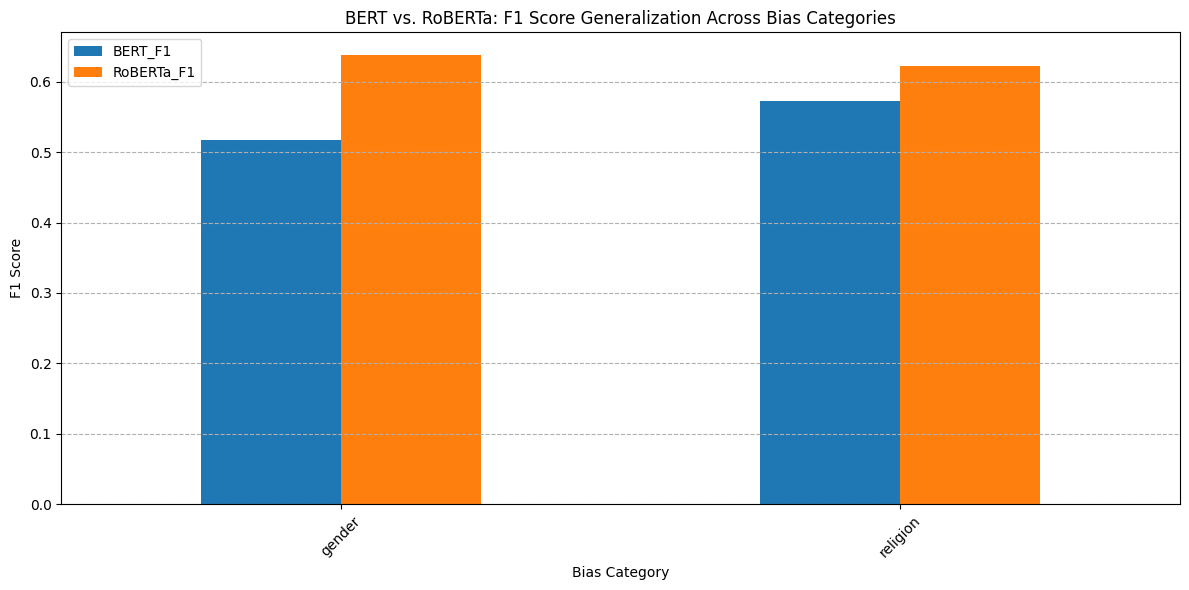

In [ ]:
# Visualization Snippet 3: Category F1 Comparison

df_roberta_category = pd.DataFrame(metrics_by_category_roberta).T
print("\n--- Visualizing F1 Score Comparison by Bias Category ---")

df_bert_category = pd.DataFrame(metrics_by_category).T

# Combine both model results into a single DataFrame for comparison
df_comparison = pd.DataFrame({
    'BERT_F1': df_bert_category['f1_score'],
    'RoBERTa_F1': df_roberta_category['f1_score']
})

df_comparison.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('BERT vs. RoBERTa: F1 Score Generalization Across Bias Categories')
plt.ylabel('F1 Score')
plt.xlabel('Bias Category')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()